# Template matching

This is a very simple and naive form of object detection <BR>
Template matching is simply about scanning a larger image for a template (smaller image)<BR>
It is done by sliding the template across the larger image<BR>
There are several methods that perform this functionality:<BR>
<BR>
![title](images/opencv-template-matching-methods.jpg)
<BR>
### Full image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('images/people.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

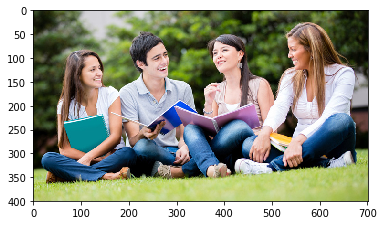

In [3]:
plt.imshow(full)

### Template image

In [4]:
face= cv2.imread('images/people_face_to_find.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

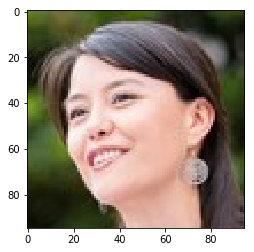

In [5]:
plt.imshow(face)

In [10]:
height, width,channels = face.shape

In [34]:
print("height = {}, width = {}".format(height, width))

height = 95, width = 95


In [11]:
methods = {'TM_CCOEFF':cv2.TM_CCOEFF, 
        'TM_CCOEFF_NORMED':cv2.TM_CCOEFF_NORMED,
        'TM_CCORR':cv2.TM_CCORR, 
        'TM_CCORR_NORMED':cv2.TM_CCORR_NORMED,
        'TM_SQDIFF':cv2.TM_SQDIFF, 
        'TM_SQDIFF_NORMED':cv2.TM_SQDIFF_NORMED}

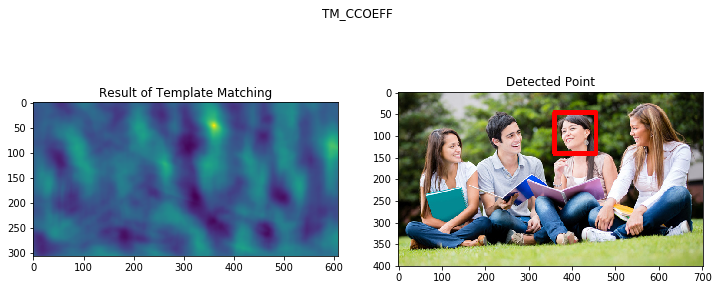

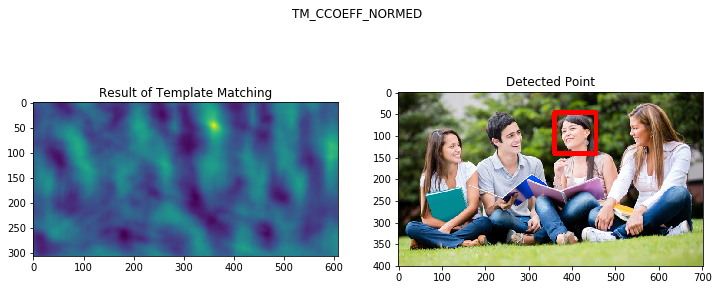

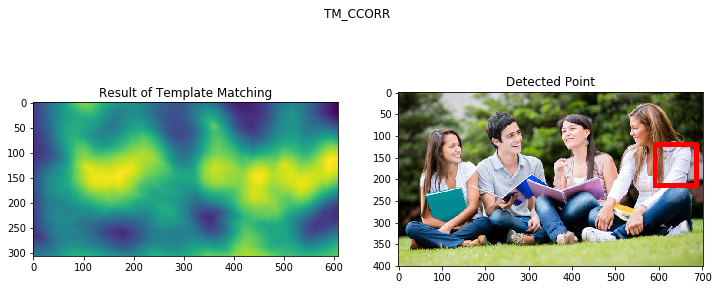

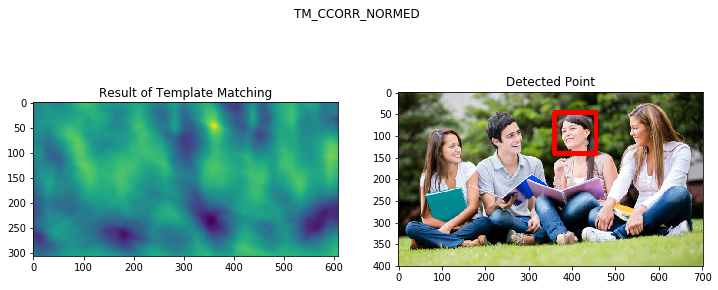

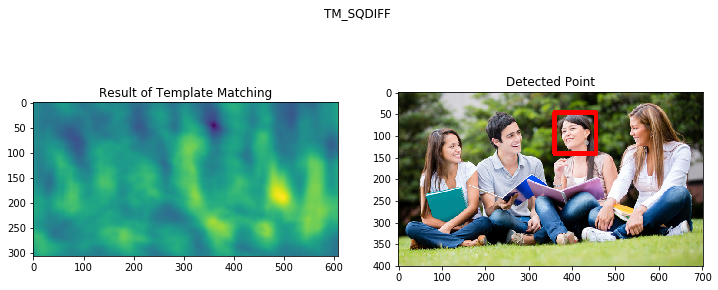

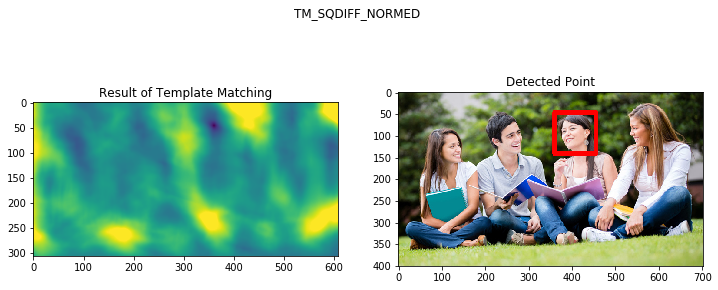

In [26]:
for m in methods.keys():
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = methods[m]

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

## Multiple instances of the template in the bigger picture

The above code assumes that the template occurs a single time in the larger image (looking for min & max)
Lets see how to handle multiple instances<BR>
    
So lets look at another image


In [22]:
space = cv2.imread('images/space-invaders.png')
space = cv2.cvtColor(space, cv2.COLOR_BGR2RGB)
invader = cv2.imread('images/space-invaders_t1.png')
invader = cv2.cvtColor(invader, cv2.COLOR_BGR2RGB)

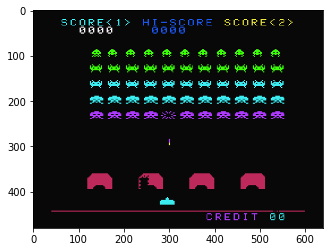

In [23]:
plt.imshow(space)


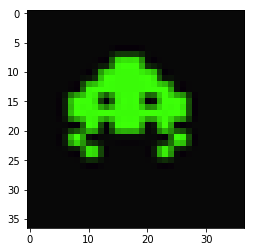

In [24]:
plt.imshow(invader)

number of instances found is: 30


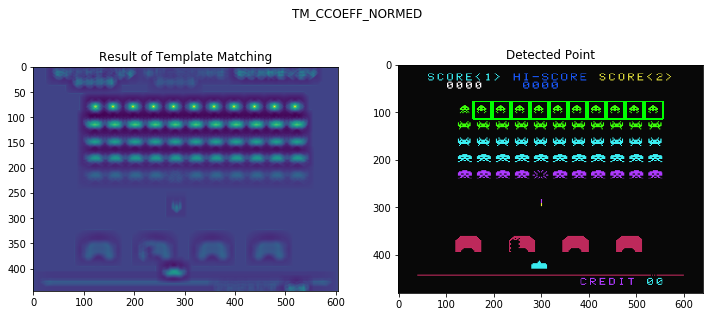

In [33]:
threshold = 0.9
m = 'TM_CCOEFF_NORMED'
#m = 'TM_SQDIFF'
full_copy = space.copy()
w, h, c = invader.shape[::]
    
# Get the actual function instead of the string
method = methods[m]

# Apply template Matching with the method
res = cv2.matchTemplate(full_copy, invader,method)
    
# Look for multiple instances based on threshold
loc = np.where(res >= threshold)
print("number of instances found is: {}".format(len(loc[0])))
    
for pt in zip(*loc[::-1]):
    cv2.rectangle(full_copy, pt, (pt[0]+w, pt[1]+h), (0,255,0), 2)
    
# Plot the Images
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(res)
plt.title('Result of Template Matching')
    
plt.subplot(122)
plt.imshow(full_copy)
plt.title('Detected Point')
plt.suptitle(m)
    
plt.show()
print('\n')
print('\n')